In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
# Libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


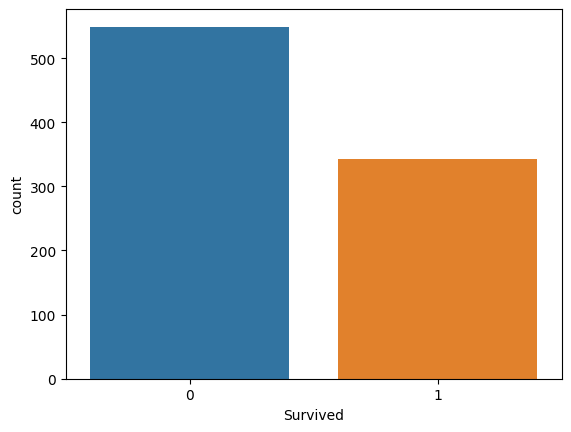

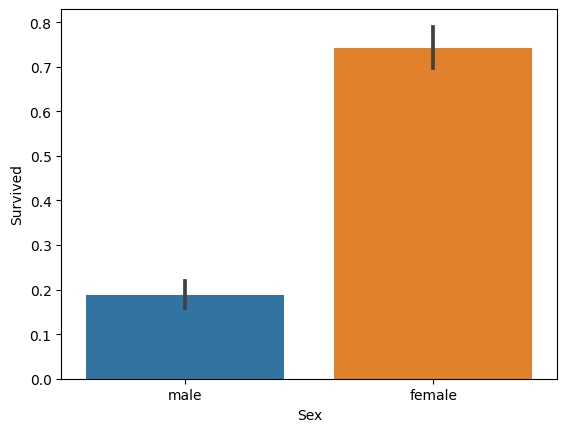

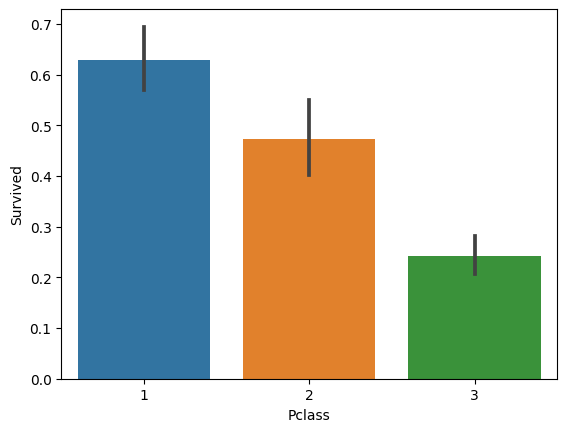

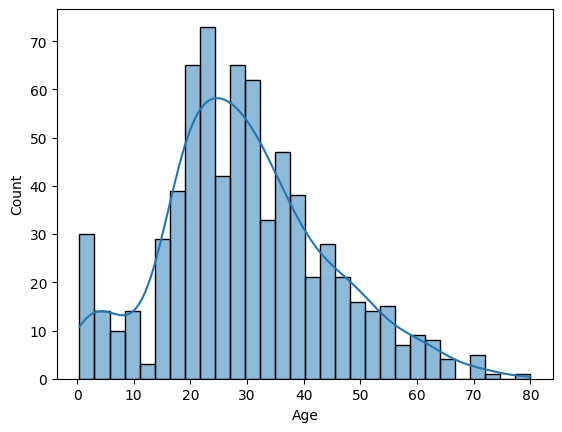

In [13]:


# Load datasets using the Kaggle input path
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")

# Check the first few rows
train.head()


# Quick look at training data
train.head()
train.info()
train.describe()

train.isnull().sum()
test.isnull().sum()

sns.countplot(x='Survived', data=train)
plt.show()

sns.barplot(x='Sex', y='Survived', data=train)
plt.show()

sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()

sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.show()


In [14]:



# Fill Age with median
age_imputer = SimpleImputer(strategy='median')
train['Age'] = age_imputer.fit_transform(train[['Age']])
test['Age'] = age_imputer.transform(test[['Age']])

# Fill Embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

# Fill Fare in test set
test['Fare'].fillna(test['Fare'].median(), inplace=True)


# Encode Sex
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])

# Encode Embarked
train['Embarked'] = LabelEncoder().fit_transform(train['Embarked'])
test['Embarked'] = LabelEncoder().fit_transform(test['Embarked'])


# Family size
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

drop_cols = ['Name', 'Ticket', 'Cabin', 'PassengerId']
X_train_full = train.drop(drop_cols + ['Survived'], axis=1)
y_train = train['Survived']
X_test = test.drop(drop_cols, axis=1)

# Split training data for validation
X_train, X_val, y_train_split, y_val = train_test_split(X_train_full, y_train, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train_split)

# Evaluate on validation set
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


test_predictions = model.predict(X_test)

# Create submission dataframe
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": test_predictions
})

submission.to_csv('submission.csv', index=False)

Validation Accuracy: 0.8100558659217877
[[89 16]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

